# Problem Statement

Developing an effective credit card fraud detection model is essential in mitigating financial losses and maintaining trust in financial systems.

In this project, we are examining the Credit Card Transactions Fraud Detection Dataset which contains both a training dataset and a testing dataset. We will first perform an exploratory data analysis to the training data to understand which features might be correlated to fraudulent activities and then attempt to create models with those features and test out their predicitve effectiveness.

## 1. Import Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## 2. Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_set =pd.read_csv('drive/MyDrive/creditCardFraud/Data/data_train.csv')
train_set.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merchant_id
0,0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1
1,1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2
2,2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,3
3,3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,4
4,4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,5


In [4]:
test_set = pd.read_csv('drive/MyDrive/creditCardFraud/Data/data_test.csv')
test_set.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
train_set.shape

(1296675, 24)

In [7]:
train_set.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
merchant_id              0
dtype: int64

## Preprocessing

In [8]:
#Drop irrelevant columns
train_set =train_set.drop(['Unnamed: 0','unix_time'],axis=1)

In [9]:
df = train_set

In [10]:
# convert datetime columns
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],infer_datetime_format=True)
df['dob'] = pd.to_datetime(df['dob'],infer_datetime_format= True)

In [11]:
# Add column hour of day
df['hour_of_day'] = df.trans_date_trans_time.dt.hour
df['day']=df['trans_date_trans_time'].dt.dayofweek
df['month']=df['trans_date_trans_time'].dt.month
df['age']=df['trans_date_trans_time'].dt.year-df['dob'].dt.year


In [12]:
# Convert Dtypes
df.cc_num = df.cc_num.astype('category')

In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 26 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  category      
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

## Data Analysis

In [14]:
#Target column statistics


labels =['Non Fraud','Fraud']
values = df['is_fraud'].value_counts().values.tolist()  #convert series to list of values
fig = px.pie(names=labels, values=values, color_discrete_sequence=['lightblue','lightpink'],
             title= 'How many people fraud in the transactions?')
fig.show()


* Observation:
In the case of the Credit Card Fraud dataset, severe imbalance is observed.
Oversampling or undersampling should be considered.

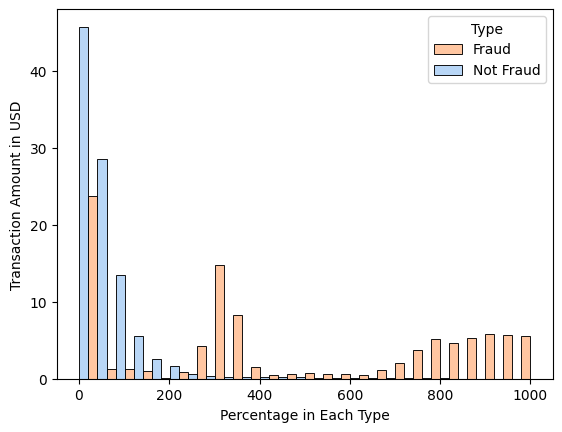

In [15]:
# amount vs fraud
ax = sns.histplot(data=df[df.amt<=1000],x='amt',hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25,palette= 'pastel')
ax.set_xlabel('Percentage in Each Type')
ax.set_ylabel('Transaction Amount in USD')
plt.legend(title='Type',labels=['Fraud', 'Not Fraud'])

* Observation:

While normal transactions tend tobe around \$200 or less, we see fraudlent transactions peak around \$300 and then at the \$800-\$1000 range.

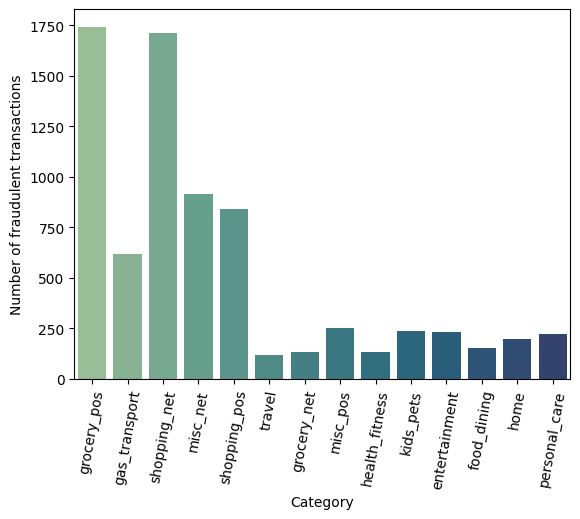

In [16]:
# category vs fraud
ax = sns.countplot(data=df[df.is_fraud==1],x='category',palette= 'crest')
ax.set_xlabel('Category')
ax.set_ylabel('Number of fraudulent transactions')
plt.xticks(rotation=80)
plt.show()

Most frauds occured in categories of shopping_net and grocery_pos

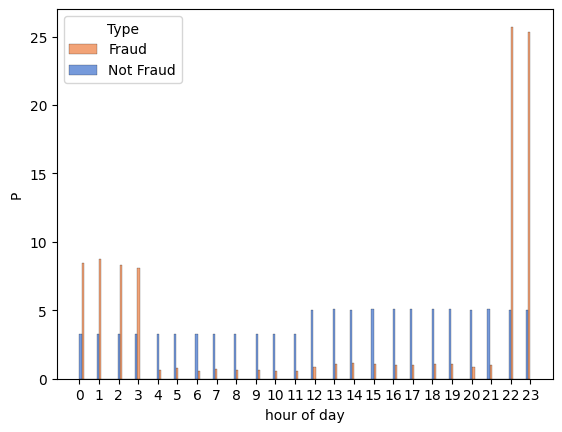

In [17]:
# time in day with fraud
ax = sns.histplot(data = df, x="hour_of_day", hue="is_fraud",common_norm= False,stat='percent',multiple='dodge',palette= 'muted')
ax.set_ylabel('P')
ax.set_xlabel('hour of day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])


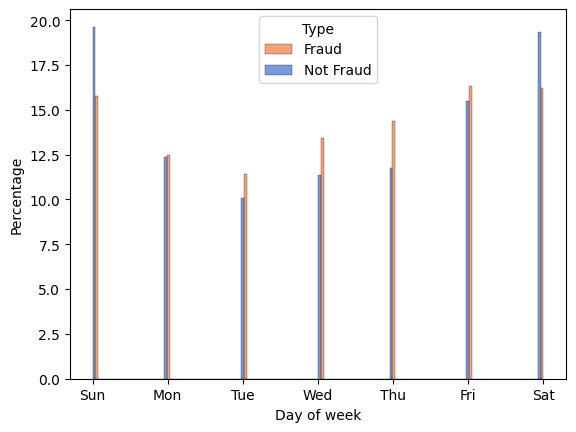

In [18]:
#day of week with fraud

ax = sns.histplot(data=df,x='day',hue='is_fraud',stat='percent',multiple='dodge',palette='muted',common_norm=False)
ax.set_xticklabels([" ","Sun","Mon","Tue","Wed","Thu","Fri","Sat"])
ax.set_xlabel('Day of week')
ax.set_ylabel('Percentage')
plt.legend(title='Type',labels=['Fraud','Not Fraud'])
plt.show()

<Axes: xlabel='gender', ylabel='count'>

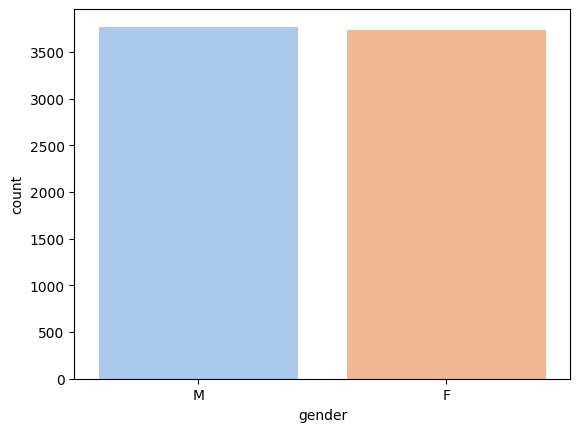

In [19]:
sns.countplot(data=df[df.is_fraud ==1],x='gender',palette= 'pastel')

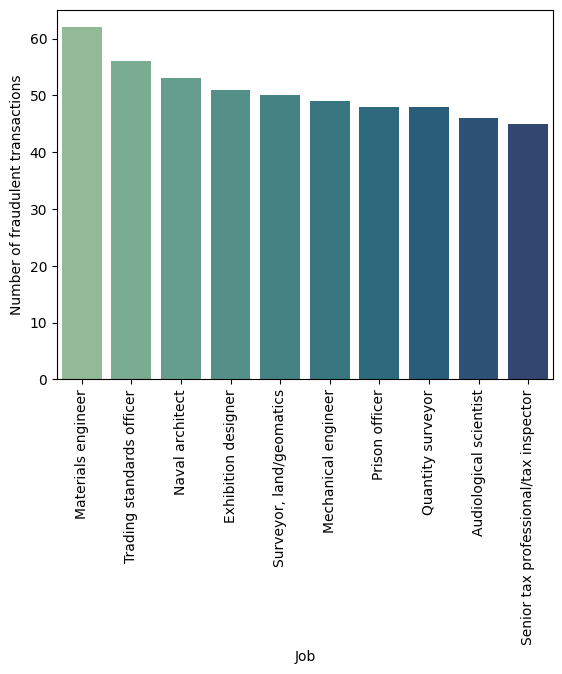

In [20]:
fraudulent_jobs = df[df.is_fraud ==1]["job"].value_counts().head(10)
ax=sns.barplot(x=fraudulent_jobs.index,y=fraudulent_jobs.values,palette='crest')
ax.set_xlabel('Job')
ax.set_ylabel('Number of fraudulent transactions')
plt.xticks(rotation=90)
plt.show()

<Axes: >

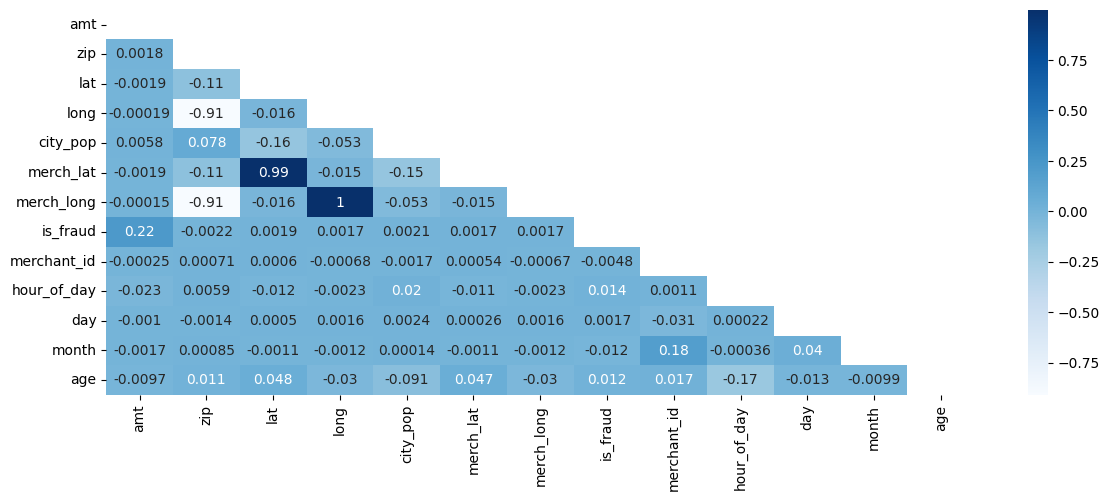

In [21]:
fig= plt.figure(figsize=(14,5))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask=mask,cmap="Blues",annot=True)


### Feature engineering

In [22]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype =="O"]


In [23]:
def apply_feature_engineering(df):
  for cols in categorical_cols:
    label_encoder = LabelEncoder()
    df[cols]=label_encoder.fit_transform(df[cols])
  return df
df= apply_feature_engineering(df)

## Apply machine learing model

Based on our EDA above, we have found out that the features including transactions amount, credit card holder age, spending category, transaction time and locations all have varying degress of correlations with credit card fraud.

The plan is train the models on the training data set which we have analyzed above and then use the testing dataset to evalute the model performance.

In [24]:

def prepare_X_y(df):

  features =['category','amt','lat','long','merch_lat','merch_long','hour_of_day','day','month','job']
  X = df[features]
  y= df["is_fraud"]
  return X,y


In [25]:
# convert datetime columns
test_set['trans_date_trans_time'] = pd.to_datetime(test_set['trans_date_trans_time'],infer_datetime_format=True)
test_set['dob'] = pd.to_datetime(test_set['dob'],infer_datetime_format= True)

# Add columns
test_set['hour_of_day'] = test_set.trans_date_trans_time.dt.hour
test_set['day']=test_set['trans_date_trans_time'].dt.dayofweek
test_set['month']=test_set['trans_date_trans_time'].dt.month
test_set['age']=test_set['trans_date_trans_time'].dt.year-df['dob'].dt.year


categorical_cols_test = [feature for feature in test_set.columns if test_set[feature].dtype =="O"]
test_set= apply_feature_engineering(test_set)


In [26]:
X_train,y_train= prepare_X_y(df)
X_test,y_test= prepare_X_y(test_set)

## No handle imbalances

In [27]:
names =['Logistic','Decision Tree','Random Forest','XGBoost']
precision_scores = []
recall_scores=[]
f1_scores=[]

#### Logistic

In [ ]:


def build_model_LR(X,y):
  scaler = StandardScaler()
  logisticregression = LogisticRegression()
  model = Pipeline (steps =[('scaler',scaler),('logisticregression',logisticregression)])
  param_grid ={
      'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'logisticregression__penalty': ['l1', 'l2']
  }
  grid = GridSearchCV(model,param_grid=param_grid, cv=5)
  grid.fit(X,y)
  return grid


In [28]:
from sklearn.metrics import *
def calculate_performance(y_true,y_pred):

  print("\nprecision", precision_score(y_true,y_pred,average='weighted') )
  print("recall",recall_score(y_true,y_pred, average='weighted') )
  print("accuracy", accuracy_score (y_true, y_pred) )
  print("F1",f1_score(y_true,y_pred, average='weighted') )

  # Only choose one of them as score for the question 7
  main_score = f1_score(y_true,y_pred,average='weighted')
  print ("Main_score : ",main_score)
  print("-" * 100)
  print("Classification report: \n", classification_report(y_true , y_pred))



In [ ]:
model = build_model_LR(X_train,y_train)
pred = model.predict(X_test)
calculate_performance(y_test,pred)

precision_scores.append(precision_score(y_test,pred,average='weighted'))
recall_scores.append(recall_score(y_test,pred,average='weighted'))
f1_scores.append(f1_score(y_test,pred,average='weighted'))


precision 0.9922928158304569
recall 0.9955283155695595
accuracy 0.9955283155695595
F1 0.9939079325509798
Main_score :  0.9939079325509798
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def build_model_D(X,y):
  scaler = StandardScaler()
  decisiontreeclassifier = DecisionTreeClassifier()
  model = Pipeline (steps =[('scaler',scaler),('tree',decisiontreeclassifier)])
  param_grid = {
          'tree__criterion': ["gini", "entropy", "log_loss"],
          'tree__splitter': ["best","random"],
          'tree__max_depth': range(5,20)

  }
  grid = GridSearchCV(model,param_grid=param_grid, cv=5)
  grid.fit(X,y)
  return grid

In [ ]:
model = build_model_D(X_train,y_train)
pred = model.predict(X_test)
calculate_performance(y_test,pred)

precision_scores.append(precision_score(y_test,pred,average='weighted'))
recall_scores.append(recall_score(y_test,pred,average='weighted'))
f1_scores.append(f1_score(y_test,pred,average='weighted'))


precision 0.9979471204340161
recall 0.9980871627567169
accuracy 0.9980871627567169
F1 0.9979834549044615
Main_score :  0.9979834549044615
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.81      0.65      0.73      2145

    accuracy                           1.00    555719
   macro avg       0.91      0.83      0.86    555719
weighted avg       1.00      1.00      1.00    555719



Randomforest model

In [29]:
from sklearn.ensemble import RandomForestClassifier

def build_model_RF(X,y):

    scaler = StandardScaler()
    rf = RandomForestClassifier()
    model = Pipeline (steps =[('scaler',scaler),('rf',rf)])
    param_grid = {
        'rf__n_estimators': [50, 100, 120],
        'rf__max_features': ['sqrt', 'log2'],
        'rf__max_depth': range(5,20),
        'rf__criterion': ["gini", "entropy", "log_loss"]
    }
    grid = GridSearchCV(model, param_grid = param_grid, n_jobs=2)
    grid.fit(X,y)
    return grid


In [ ]:
model = build_model_RF(X_train,y_train)
pred = model.predict(X_test)
calculate_performance(y_test,pred)

precision_scores.append(precision_score(y_test,pred,average='weighted'))
recall_scores.append(recall_score(y_test,pred,average='weighted'))
f1_scores.append(f1_score(y_test,pred,average='weighted'))

Xgboost model

In [ ]:
from xgboost import XGBClassifier

def build_model_XGB(X,y):
    scaler = StandardScaler()
    xgb = XGBClassifier()
    model = Pipeline(steps =[('scaler',scaler),('xgb',xgb)] )

    param_grid = {
        'xgb__max_depth': range(5,18),
        'xgb__learning_rate': [0.01, 0.1, 0.5],
        'xgb__n_estimators': [50, 100, 120]
    }
    grid = GridSearchCV (model, param_grid = param_grid, n_jobs = 2)

    grid.fit(X,y)
    return grid



In [ ]:
model = build_model_XGB(X_train,y_train)
pred = model.predict(X_test)
calculate_performance(y_test,pred)

precision_scores.append(precision_score(y_test,pred,average='weighted'))
recall_scores.append(recall_score(y_test,pred,average='weighted'))
f1_scores.append(f1_score(y_test,pred,average='weighted'))

## Handle imbalances